In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

In [ ]:
df = pd.read_csv('/content/.csv')

In [ ]:
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607.0,525000,house,4
1,2007-02-27 00:00:00,2906.0,290000,house,3
2,2007-03-07 00:00:00,2905.0,328000,house,3
3,2007-03-09 00:00:00,2905.0,380000,house,4
4,2007-03-21 00:00:00,2906.0,310000,house,3
...,...,...,...,...,...
29584,2019-07-25 00:00:00,2900.0,500000,unit,3
29585,2019-07-25 00:00:00,2612.0,560000,unit,2
29586,2019-07-26 00:00:00,2912.0,464950,unit,2
29587,2019-07-26 00:00:00,2601.0,589000,unit,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29589 entries, 0 to 29588
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datesold      29589 non-null  object 
 1   postcode      29585 non-null  float64
 2   price         29589 non-null  int64  
 3   propertyType  29589 non-null  object 
 4   bedrooms      29589 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ MB


In [ ]:
df.duplicated(subset=None).sum().sum()

9

In [ ]:
df['postcode'] = df['postcode'].fillna('Unknown')

In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [ ]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607.0,525000,house,4
1,2007-02-27 00:00:00,2906.0,290000,house,3
2,2007-03-07 00:00:00,2905.0,328000,house,3
3,2007-03-09 00:00:00,2905.0,380000,house,4
4,2007-03-21 00:00:00,2906.0,310000,house,3


In [ ]:
#df['datesold_dt'] = pd.to_datetime(df['datesold'], errors='raise', dayfirst=False, yearfirst=False, utc=None, format="%Y/%m/%d", exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)


In [ ]:
df = df[df['postcode'] != 2604.0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28522 entries, 0 to 29588
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      28522 non-null  object        
 1   postcode      28522 non-null  object        
 2   price         28522 non-null  int64         
 3   propertyType  28522 non-null  object        
 4   bedrooms      28522 non-null  int64         
 5   datesold_dt   28522 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
df_house = df[df['propertyType'] == 'house']
df_unit = df[df['propertyType'] == 'unit']

In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24124 entries, 0 to 24560
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      24124 non-null  object        
 1   postcode      24124 non-null  object        
 2   price         24124 non-null  int64         
 3   propertyType  24124 non-null  object        
 4   bedrooms      24124 non-null  int64         
 5   datesold_dt   24124 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
df_house.describe()

,price,bedrooms
count,2.412400e+04,24124.000000
mean,6.450578e+05,3.546634
std,2.840314e+05,0.707782
min,5.650000e+04,0.000000
25%,4.740000e+05,3.000000
50%,5.820000e+05,4.000000
75%,7.350000e+05,4.000000
max,8.000000e+06,5.000000


In [ ]:
df_house.head(5)

,datesold,postcode,price,propertyType,bedrooms,datesold_dt
0,2007-02-07 00:00:00,2607.0,525000,house,4,2007-02-07
1,2007-02-27 00:00:00,2906.0,290000,house,3,2007-02-27
2,2007-03-07 00:00:00,2905.0,328000,house,3,2007-03-07
3,2007-03-09 00:00:00,2905.0,380000,house,4,2007-03-09
4,2007-03-21 00:00:00,2906.0,310000,house,3,2007-03-21


In [ ]:
df.groupby('propertyType')['price'].max()

propertyType
house    8000000
unit     2500000
Name: price, dtype: int64

In [ ]:
df_house['price'].median() - df_unit['price'].median()

202000.0

In [ ]:
from scipy.stats import skew
skew(df.price)

4.404608024608133

In [ ]:
from scipy.stats import kurtosis
kurtosis(df.price)

56.80272480737614

<ipython-input-172-483d3b707cc4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df.price, kde=False, fit=norm)


<Axes: xlabel='price'>

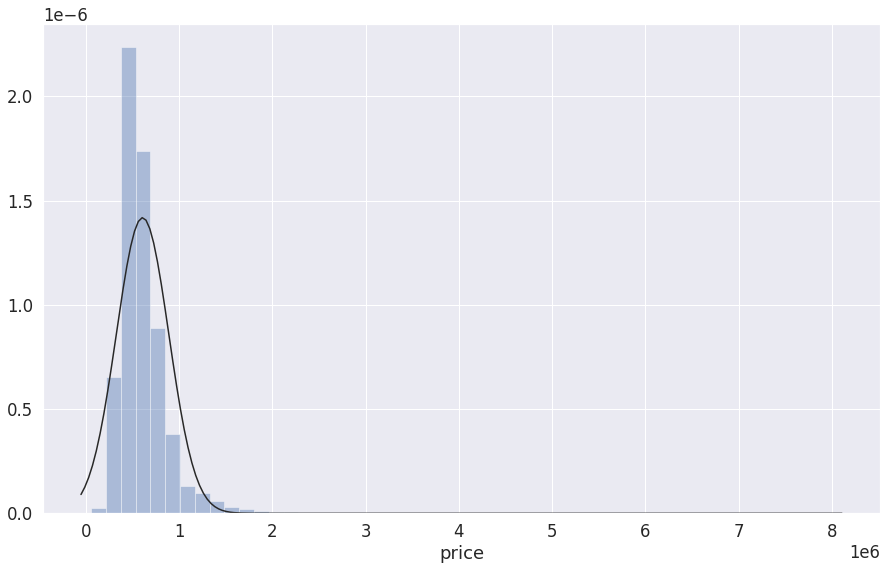

In [ ]:
sns.set(font_scale=1.5)
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.price, kde=False, fit=norm)

In [ ]:
df_house.groupby(df_house['datesold_dt'].dt.year)['price'].max().sort_values(ascending=False)

datesold_dt
2015    8000000
2010    7300000
2016    6480000
2011    5425000
2017    4700000
2019    4500000
2018    3750000
2008    3500000
2014    3400000
2012    2760000
2009    2600000
2013    1880000
2007    1780000
Name: price, dtype: int64

In [ ]:
df_unit.groupby(df_unit['datesold_dt'].dt.year)['price'].max().sort_values(ascending=False)

datesold_dt
2016    2500000
2018    2280000
2012    1555000
2017    1495000
2014    1490000
2015    1430000
2013    1380000
2010    1275000
2009    1150000
2019     950000
2011     825000
2007     529000
2008     440000
Name: price, dtype: int64

(array([2.5093e+04, 3.1640e+03, 2.1400e+02, 3.4000e+01, 7.0000e+00,
        5.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  56500.,  850850., 1645200., 2439550., 3233900., 4028250.,
        4822600., 5616950., 6411300., 7205650., 8000000.]),
 <BarContainer object of 10 artists>)

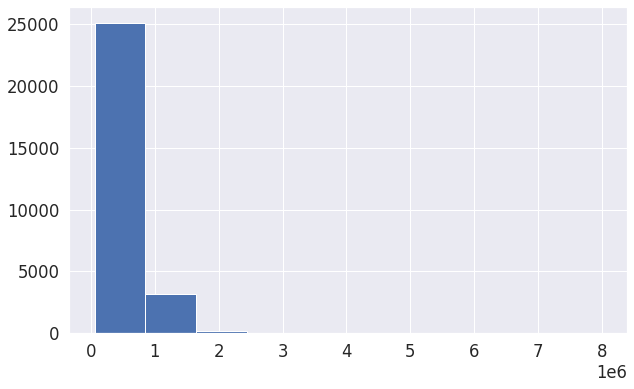

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['price'])

<Axes: xlabel='price'>

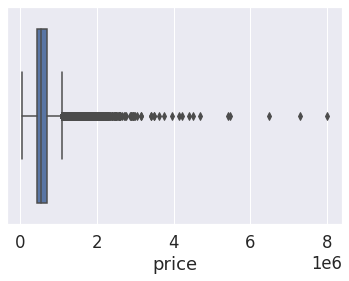

In [ ]:
sns.boxplot(x=df['price'])

In [ ]:
df["datesold"] = df.apply(lambda row: pd.to_datetime(row['datesold'],format='%Y-%m-%d %H:%M:%S'),axis = 1)

In [ ]:
df.head()

,datesold,postcode,price,propertyType,bedrooms,datesold_dt
0,2007-02-07,2607.0,525000,house,4,2007-02-07
1,2007-02-27,2906.0,290000,house,3,2007-02-27
2,2007-03-07,2905.0,328000,house,3,2007-03-07
3,2007-03-09,2905.0,380000,house,4,2007-03-09
4,2007-03-21,2906.0,310000,house,3,2007-03-21


In [ ]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28522 entries, 0 to 29588
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      28522 non-null  datetime64[ns]
 1   postcode      28522 non-null  object        
 2   price         28522 non-null  int64         
 3   propertyType  28522 non-null  object        
 4   bedrooms      28522 non-null  int64         
 5   datesold_dt   28522 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3570 entries, 2007-02-07 to 2019-07-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   3570 non-null   float64
dtypes: float64(1)
memory usage: 55.8 KB


In [ ]:
df_house.price.mean()

645057.8282208589

In [ ]:
df_house.price.median()

582000.0

In [ ]:
from math import sqrt
print(sqrt(df_house.price.median()))

762.889244910426


In [ ]:
df_date.price.std()

166986.18423280495

In [ ]:
df_house.price.skew()

4.759465916441266

In [ ]:
df_house.price.kurt()

62.16692175870733

In [ ]:
from scipy.stats import poisson
#параметр формы мю (mu) и размер выборки, которую необходимо сгенерировать, и выбрать, нужна ли вам уникальная выборка*
poisson.rvs(mu=586159, size=3500, random_state=None)

array([586074, 586963, 587055, ..., 586027, 587420, 586158])

(array([  3.,  36., 150., 456., 773., 934., 694., 324., 112.,  18.]),
 array([583373., 583893., 584413., 584933., 585453., 585973., 586493.,
        587013., 587533., 588053., 588573.]),
 <BarContainer object of 10 artists>)

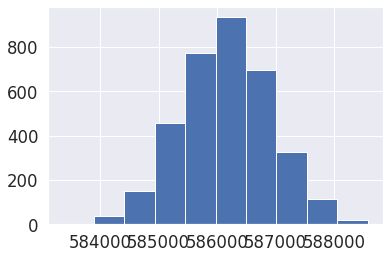

In [ ]:
plt.hist(poisson.rvs(mu=586159, size=3500, random_state=None))

In [ ]:
df_house.reset_index(inplace=True)

In [ ]:
df.tail(3)

,datesold,postcode,price,propertyType,bedrooms,datesold_dt
29586,2019-07-26,2912.0,464950,unit,2,2019-07-26
29587,2019-07-26,2601.0,589000,unit,2,2019-07-26
29588,2019-07-26,2612.0,775000,unit,2,2019-07-26


In [ ]:
from scipy.stats import shapiro
datedata_index = np.random.randint(low = 0, high = len(df_house), size=5000)
df_index = np.random.randint(low = 0, high = len(df), size=5000)
stat, p = shapiro(df_house["price"][datedata_index])
p

0.0

In [ ]:
alpha = 0.01
n = df_house["price"].count()
mu_hat = df_house["price"].mean()
std_hat = df_house["price"].std(ddof = 1) /  np.sqrt(n)
stats.t.interval(1 - alpha / 2, df = (n-1), loc = mu_hat, scale = std_hat)

(639924.1423353952, 650191.5141063228)

In [ ]:
import numpy as np
import scipy.stats as st

#define sample data
data = df_house["price"]

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.99, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

<ipython-input-201-3a1533992eac>:8: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.99, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))


(640347.0448584857, 649768.6115832322)

In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24124 entries, 0 to 24123
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         24124 non-null  int64         
 1   datesold      24124 non-null  object        
 2   postcode      24124 non-null  object        
 3   price         24124 non-null  int64         
 4   propertyType  24124 non-null  object        
 5   bedrooms      24124 non-null  int64         
 6   datesold_dt   24124 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.3+ MB


In [ ]:
alpha = 0.01
n = len(df_house)
mu_hat = df_house["price"].mean()
std_hat = df_house["price"].std(ddof = 1) /  np.sqrt(n)
stats.t.interval(1 - alpha / 2, df = (n-1), loc = mu_hat, scale = std_hat)

(639924.1423353952, 650191.5141063228)

In [ ]:
alpha = 0.01
n = len(df)
mu_hat = df["price"].mean()
std_hat = df["price"].std(ddof = 1) /  np.sqrt(n)
stats.t.interval(1 - alpha / 2, df = (n-1), loc = mu_hat, scale = std_hat)

(603654.019238099, 613006.4228066383)

In [ ]:
from prophet import Prophet
df_intensity = df_house[["datesold_dt", "price"]].groupby([df_house['datesold_dt'].dt.date]).mean()
df_intensity = df_intensity.reset_index().rename(columns={"datesold_dt":"ds", "price":"y"})
model = Prophet(weekly_seasonality=False, yearly_seasonality=True, daily_seasonality=False)
model.add_country_holidays(country_name = 'US')
# index = 365
# train, test = df_intensity[:-index], df_intensity[-index:]
model.fit(df_intensity)
predictions_period = model.make_future_dataframe(periods=365, freq = 'D')
predictions_period = predictions_period[-365:]
forecast = model.predict(predictions_period)
forecast.info()
forecast['ds'].value_counts()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpz1pcz5qn/pkk4rlf2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz1pcz5qn/s3k97nw2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25157', 'data', 'file=/tmp/tmpz1pcz5qn/pkk4rlf2.json', 'init=/tmp/tmpz1pcz5qn/s3k97nw2.json', 'output', 'file=/tmp/tmpz1pcz5qn/prophet_modelxseoetpz/prophet_model-20230327094455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:44:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:44:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ds                                 365 non-null    datetime64[ns]
 1   trend                              365 non-null    float64       
 2   yhat_lower                         365 non-null    float64       
 3   yhat_upper                         365 non-null    float64       
 4   trend_lower                        365 non-null    float64       
 5   trend_upper                        365 non-null    float64       
 6   Christmas Day                      365 non-null    float64       
 7   Christmas Day_lower                365 non-null    float64       
 8   Christmas Day_upper                365 non-null    float64       
 9   Christmas Day (Observed)           365 non-null    float64       
 10  Christmas Day (Observed)_lower     365

,ds,yhat,yhat_lower,yhat_upper
360,2020-07-22,760091.394819,548637.168658,976239.896257
361,2020-07-23,760703.032427,561518.406341,980713.934366
362,2020-07-24,761005.700255,552919.968150,973094.724004
363,2020-07-25,760979.853786,562001.876290,972603.808446
364,2020-07-26,760614.205279,558094.779700,993110.975654
